# Analisis Game Berpotensial Ice

Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

## Tujuan

Proyek ini berfokus pada analisis penjualan game. Data dilakukan pre-processing untuk membersihkan dan merapihkan data agar dapat diolah. Selanjutnya dilakukan Exploratory Data Analysis (EDA) dan Data Visualization untuk mengetahui oulier dan insight dari data. Dan terakhir dilakukan analisis data statistik untuk Hypothesis Testing. Data ini diambil pada Desember 2016. Hasil analisis akan memungkinkan untuk membangun acuan bagi tahun 2017. 

### Hipotesis

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

### Tahapan

Data tentang hasil ulasan game disimpan dalam file `/datasets/games_us.csv`. Tidak ada informasi terkait kualitas data tersebut, sehingga perlu dilakukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Proyek ini terdiri dari tiga tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)
3. Analisis Data Statistik (Hyphothesis Testing)


## 1. Pra-pemrosesan Data

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv') 

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.2. Mengeksplorasi Data Awal

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Deskripsi data**: 


- `Name` — nama game
- `Platform` — nama platform game dapat dimainkan
- `Genre` — jenis game
- `NA_sales`  — penjualan di Amerika Utara dalam satuan juta USD
- `EU_sales` — penjualan di Eropa dalam satuan juta USD
- `JP_sales` — penjualan di Jepang dalam satuan juta USD
- `Other_sales` — penjualan di negara lainnya dalam satuan juta USD
- `Critic_Score` — skor ulasan dari kritikus, maksimal 100
- `User_Score` — skor ulasan dari pengguna, maksimal 10
- `Rating` — Entertainment Software Rating Board (ESRB)

In [4]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Kesimpulan sementara:**

* Nama kolom tidak huruf kecil.
* Terlihat ada beberapa nilai yang hilang.
* Kolom `Year_of_Release` akan terlihat lebih rapih apabila menggunakan integer.

In [5]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [6]:
# Check unique data from 'User_Score' column
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# Check duplicated data
data.duplicated().sum()

0

**Kesimpulan sementara:**

* Kolom `Critic_Score`, `Rating`, `User_Score`, `Year_of_Release`, `Name` dan  `Genre` terdapat nilai hilang yang perlu dianalisis.
* Kolom `User_Score` terdapat nilai TBD yang merupakan anomali sehingga perlu dianalisis lebih dalam.
* Dataset tidak memiliki duplikat pada datanya.


In [8]:
# Calculating some statistical data 
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Kesimpulan sementara:**

* Kolom sales terdapat nilai yang tidak wajar, yaitu min sales dan 25% sales adalah 0.000000 sehingga perlu dianalisis.


### Kesimpulan dan Langkah-Langkah Selanjutnya

#### **Gaya Penulisan Judul**

Judul kolom memiliki huruf besar dan kecil. Untuk mempermudah analisis, nama kolom akan diubah menjadi huruf kecil.

#### **Nilai yang Hilang**

Setiap baris dalam tabel menyimpan data terkait penjualan game yang telah terjual. Sejumlah kolom menyimpan data yang mendeskripsikan game itu sendiri: tahun rilis, platform yang digunakan, dan tipe game. Sisanya menyimpan data terkait informasi game terjual beserta penilaiannya: Penjualan di Amerika, Eropa, Jepang dan negara-negara lain, nilai ulasan kritikus dan pengguna, serta Rating game tersebut.

Jelas bahwa data yang kita miliki cukup untuk menguji hipotesis. Meski demikian, kita memiliki nilai-nilai yang hilang.

* Setiap nilai hilang akan diperiksa terlebih dahulu persentase terhadap keseluruhan data. Kemudian akan diperiksa berpola atau tidak, untuk mengatasi tindakan apa yang perlu dilakukan untuk mengatasi nilai hilang tersebut.

Alasan mengapa data tersebut hilang sangatlah berguna untuk mempelajari dan mencoba memperbaikinya namun sayangnya, kita belum memiliki kesempatan tersebut dalam proyek ini.

#### **Gaya Penulisan**

Setelah mengatasi nilai-nilai yang hilang, langkah selanjutnya yaitu merapihkan data:

* Mengubah nilai pada kolom `Year_of Release` menjadi integer.
* Membuat kolom baru untuk menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game.

#### **Duplikat**

Selanjutnya memeriksa duplikat pada data. Namun, pada dataset ini tidak memiliki data duplikat pada data. Sehingga tidak perlu dilakukan analisis duplikat awal.

#### **Anomali Data**

Setelah memeriksa data duplikat perlu memepertimbangkan data anomali berikut, karena data tersebut mempengaruhi analisis penelitian.

* Pada kolom `User_Score` terdapat nilai yang tidak wajar, yaitu TBD.

### 1.3. Memperbaiki Penulisan Judul

In [9]:
# Check the name of columns
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
# Renaming the columns
data = data.rename(columns=str.lower)

In [11]:
# checking columns
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 1.4. Mengatasi Nilai-Nilai yang Hilang

In [12]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Langkah pertama** dalam menangani nilai-nilai yang hilang yaitu menghitung persentasenya serta dibandingkan dengan keseluruhan data untuk mengetahui dampak dari nilai-nilai yang hilang tersebut terhadap dataset.

In [13]:
# Loop for checking the percentage of missing values per total values each column
for col in data.columns:
    missing = data[col].isnull().sum()
    total = data[col].shape[0]
    percent = (missing/total) * 100
    print(f"Kolom {col}: {percent:.2f}% nilai yang hilang.")

Kolom name: 0.01% nilai yang hilang.
Kolom platform: 0.00% nilai yang hilang.
Kolom year_of_release: 1.61% nilai yang hilang.
Kolom genre: 0.01% nilai yang hilang.
Kolom na_sales: 0.00% nilai yang hilang.
Kolom eu_sales: 0.00% nilai yang hilang.
Kolom jp_sales: 0.00% nilai yang hilang.
Kolom other_sales: 0.00% nilai yang hilang.
Kolom critic_score: 51.32% nilai yang hilang.
Kolom user_score: 40.09% nilai yang hilang.
Kolom rating: 40.48% nilai yang hilang.


**Kesimpulan sementara:**

Dalam beberapa situasi, nilai yang hilang jika bagiannya tidak banyak (katakanlah, 5-10%), nilai tersebut dapat dihapus.

Pada kasus ini nilai pada kolom name, genre dan year of release bisa di hapus.


In [14]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

In [15]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Langkah kedua** dalam menangani nilai-nilai yang hilang yaitu:


1. Jika kategoris maka ditentukan apakah nilai yang hilang memiliki suatu pola. 
* Jika nilainya tidak terdapat pola, nilai tersebut dapat diganti dengan nilai default, seperti string kosong atau kata tertentu. 
* Jika berpola, maka perlu analisis lebih lanjut.


2. Jika kuantitatif maka ditentukan apakah data memiliki outlier yang signifikan.
* Jika tidak terdapat outlier yang signifikan, nilai tersebut dapat dihitung rata-rata data pada kolom atau seluruh dataset.
* Jika data memiliki oulier yang signifikan, nilai tersebut dapat dihitung median data pada kolom atau seluruh dataset.

In [16]:
# Function for checking missing pattern
def check_missing_pattern(data):
    
    missing_pattern = {}
    
    for col in data.columns:
        # Create a boolean mask to identify missing values
        mask = data[col].isnull()
        # Get sum of missing values
        missing = data[col].isnull().sum()
        
        # If there are no missing values, the pattern is "none"
        if missing == 0:
            missing_pattern[col] = "none"
        # If there is a missing value, check if there is a pattern
        else:
            # Create a boolean mask to identify non-missing values
            mask_not_missing = ~mask
            # Count the number of unique values in a column
            unique_values = data[col].nunique()
            # If there are fewer unique values than missing values, the pattern is "random"
            if unique_values < missing:
                missing_pattern[col] = "random"
            # Otherwise, the pattern is "pattern"
            else:
                missing_pattern[col] = "pattern"
    
    return missing_pattern


In [17]:
# Check the missing pattern
missing_pattern = check_missing_pattern(data)
print(missing_pattern)

{'name': 'none', 'platform': 'none', 'year_of_release': 'none', 'genre': 'none', 'na_sales': 'none', 'eu_sales': 'none', 'jp_sales': 'none', 'other_sales': 'none', 'critic_score': 'random', 'user_score': 'random', 'rating': 'random'}


**Kesimpulan sementara:**

* Kolom `critic_score` memiliki nilai hilang yang tidak berpola.
* Kolom `user_score` memiliki nilai hilang yang tidak berpola. 
* Kolom `rating` memiliki nilai hilang yang tidak berpola.

Untuk mempermudah analisa, nilai hilang pada kolom-kolom tersebut diisi dengan kata `unidentified`. Karena merupakan variabel katagoris. Untuk sementara akan diisi dengan 0. Nilai TBD akan disamakan seperti nilai hilang.

In [18]:
# Filling the missing values with fillna()
data['critic_score'] = data['critic_score'].fillna(0)

In [19]:
# Filling the missing values with fillna()
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float').fillna(0)

In [20]:
# Filling the missing values with fillna()
data['rating'] = data['rating'].fillna('unidentified')

In [21]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 1.5. Memperbaiki Tipe Data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Data pada kolom `year_of_release` diubah menjadi integer.

In [23]:
# Change the year_of_release type to integer
data['year_of_release'] = data['year_of_release'].astype(int)

### 1.6. Memperbaiki Kualitas Data

Menambahkan kolom total sales.

In [24]:
# Sumarize the total sales
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[sales].sum(axis=1)

In [25]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1325,NBA 2K14,PS4,2013,Sports,0.89,0.31,0.01,0.23,85.0,6.5,E,1.44
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31
3863,Disgaea 3: Absence of Justice,PS3,2008,Role-Playing,0.33,0.03,0.11,0.04,78.0,7.5,T,0.51
12653,Call of Duty: The War Collection,X360,2010,Shooter,0.05,0.00,0.00,0.00,0.0,0.0,M,0.05
2728,Shark Tale,PS2,2004,Action,0.37,0.29,0.00,0.10,69.0,6.5,E,0.76


## 2. Analisis Data Exploratif (EDA)

### 2.1. Memeriksa Data yang Sudah Bersih

In [26]:
# Check general data_new info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [27]:
# Calculating some statistical data
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,3.234237,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,3.689043,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Kesimpulan sementara:**

* Data sales terdapat penjualan minimum 0, kemungkinan nilai tersebut akibat game tidak laku terjual atau belum terjual. Beberapa nilai sales terdapat penjualan 0 pada kuartil bawah. Bahkan pada jp_sales median sales yaitu 0.

### 2.2. Mempelajari Parameter Inti 

Untuk mempelajari outlier memengaruhi bentuk dan kemudahan pembacaan analisis, dilakukan pendekatan kepada beberapa parameter berikut:

- Tahun rilis,
- platform yang digunakan, dan
- genre game

Berikut beberapa pertanyaan-pertanyaan dasar untuk memeriksa keakuratan data:

* Berapa jumlah game yang tercatat dalam data?
* Berapa banyak platform yang diamati?
* Dari rentang tahun berapa data tercatat?
* Berapa jumlah game yang rilis per tahunnya?
* Genre mana yang paling banyak?

In [28]:
# Ansewering basic question
print('Jawaban pertanyaan dasar tersebut yaitu:')
total_game_release = data.shape[0]
print('Jumlah game dirilis:', total_game_release)
total_platform = len(data['platform'].unique())
print('Jumlah platform:', total_platform)
print('Rentang tahun data diambil:', data['year_of_release'].min(),'hingga', data['year_of_release'].max())
print('Jumlah game dirilis per tahun:', data['year_of_release'].value_counts())
print('Genre paling banyak yaitu:',data['genre'].value_counts().head(3))

Jawaban pertanyaan dasar tersebut yaitu:
Jumlah game dirilis: 16444
Jumlah platform: 31
Rentang tahun data diambil: 1980 hingga 2016
Jumlah game dirilis per tahun: 2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64
Genre paling banyak yaitu: Action    3307
Sports    2306
Misc      1721
Name: genre, dtype: int64


**Kesimpulan sementara:**

* Game dirilis dari tahun 1980-2016 dengan 2008 memiliki jumlah game tertinggi.
* Terdapat 31 platform yang ada.
* Genre yang paling banyak beredar yaitu game bergenre Action.

Pemeriksaan selanjutnya akan menggunakan diagram data. Setiap batang atau bar yang ada pada diagram merepresentasikan sebuah nilai: semakin tinggi nilainya, semakin tinggi pula batangnya. Perbedaan antar nilai dapat terlihat dengan jelas.

In [29]:
# Getting some data
data[['platform', 'year_of_release', 'genre']]

,platform,year_of_release,genre
0,Wii,2006,Sports
1,NES,1985,Platform
2,Wii,2008,Racing
3,Wii,2009,Sports
4,GB,1996,Role-Playing
...,...,...,...
16710,PS3,2016,Action
16711,X360,2006,Sports
16712,PSV,2016,Adventure
16713,GBA,2003,Platform


Kolom `platform`, `year_of_release`, `genre` memiliki variabel katagorik. Maka diagram batang dapat digunakan.

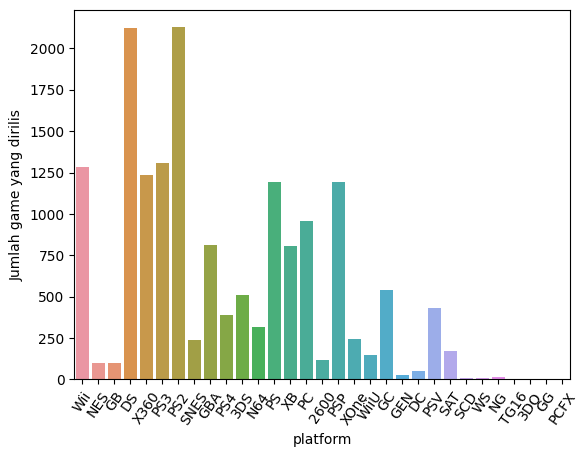

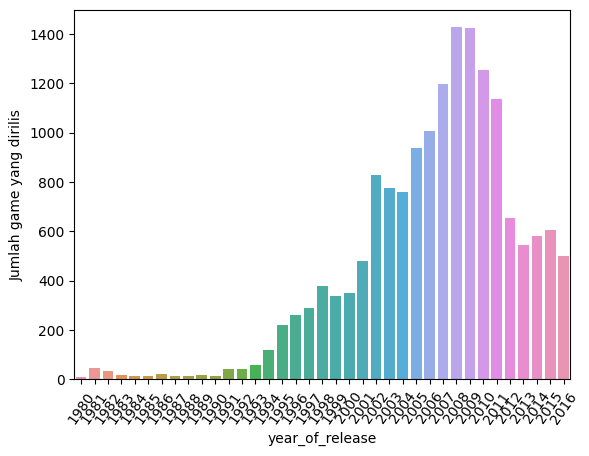

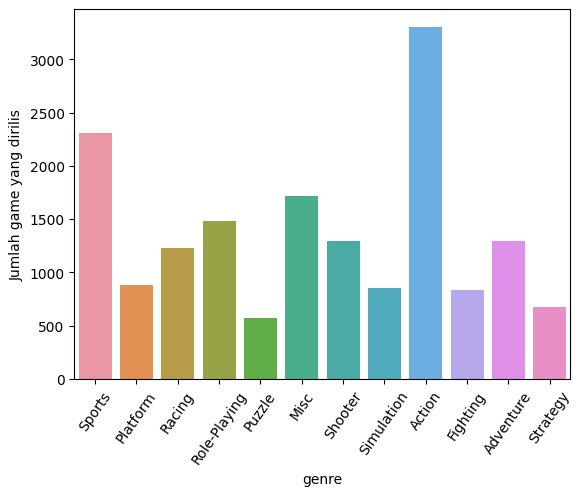

In [30]:
category_column = ['platform', 'year_of_release', 'genre']

# Loop through the column names
for column in category_column:

    # Create a bar plot with the counts of each category in the column
    sns.countplot(x=column, data=data)

    # Add x-axis label
    plt.xlabel(column)
    plt.xticks(rotation=55)

    # Add y-axis label
    plt.ylabel('Jumlah game yang dirilis')

    plt.show()

**Kesimpulan sementara:**

* Secara diagram histogram, terlihat bahwa perkembangan game dirilis mengalami peningkatan dan tertinggi yaitu pada tahun 2008.
* Platform game yang memiliki game yang telah dirilis terbanyak yaitu DS dan PS2.
* Jenis game yang paling banyak dirilis yaitu game bergenre Action


### 2.3. Penjualan Berdasarkan Platform

In [31]:
# Checking platform with most sales
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_sales.reset_index().head()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


**Kesimpulan sementara:**

* Berdasarkan total penjualan, game di platform PS2 memiliki total penjualan tertinggi yaitu 1233.56 juta USD. 


**Analisa** distribusi PS2

In [32]:
# Query PS2
platform_ps2 = data.query('platform in ("PS2")')
platform_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unidentified,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unidentified,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unidentified,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unidentified,0.01


In [33]:
# Calculate total sales of PS2 per year
platform_ps2.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
4,2004,211.81
2,2002,205.38
3,2003,184.31
1,2001,166.43
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
0,2000,39.17
9,2009,26.40


**Kesimpulan sementara:**

* Berdasarkan total penjualan game di platform PS2, tahun 2004 memiliki total penjualan tertinggi yaitu 211.81 juta USD.
* Walaupun tertinggi, namun penjualan PS2 hanya dari tahun 2000 hingga tahun 2011. Sedangkan 2012-2016 tidak ada penjualan game.


**Analisa** distribusi X360 dan PS3

In [34]:
# Query X360
platform_x360 = data.query('platform in ("X360")')
platform_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unidentified,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,0.0,0.0,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,0.0,5.1,E10+,0.01


In [35]:
# Calculate total sales of X360 per year
platform_x360.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
5,2010,170.03
6,2011,143.84
3,2008,135.26
4,2009,120.29
7,2012,99.74
2,2007,95.41
8,2013,88.58
1,2006,51.62
9,2014,34.74
10,2015,11.96


In [36]:
# Query PS3
platform_ps3 = data.query('platform in ("PS3")')
platform_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unidentified,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,0.0,0.0,unidentified,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,0.0,0.0,unidentified,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unidentified,0.01


In [37]:
# Calculate total sales of PS3 per year
platform_ps3.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
5,2011,156.78
4,2010,142.17
3,2009,130.93
2,2008,118.52
7,2013,113.25
6,2012,107.36
1,2007,73.19
8,2014,47.76
0,2006,20.96
9,2015,16.82


**Kesimpulan sementara:**

* Setelah dilakukan analisis distribusi pada platform terbaru yaitu X360 dan PS3, platform tersebut juga menempati posisi ke 2 dan ke 3 terbesar. Penjualan X360 dari tahun 2005-2016 dan 2006-2016 untuk PS3.
* Berdasarkan total penjualan game di platform X360, tahun 2010 memiliki total penjualan tertinggi yaitu 170.03 juta USD. Sedangkan pada tahun 2016 mendapatkan penjualan game hanya 1.52 juta USD.
* Berdasarkan total penjualan game di platform PS2, tahun 2011 memiliki total penjualan tertinggi yaitu 156.78 juta USD. Sedangkan pada tahun 2016 mendapatkan penjualan game hanya 3.60 juta USD.
* Melihat perbandingan distribusi data tersebut, platform PS2 mulai dilupakkan dan digantikan oleh X360 dan PS3.



**Kesimpulan:**

* Walaupun penjualan PS2 merupakan penjualan tertinggi dari keseluruhan penjualan, namun penjualan ini berhenti pada tahun 2011.
* Jika dilihat dari tahun game pertama dirilis, perlu 5-6 tahun waktu yang dibutuhkan platform baru untuk muncul. 
* Game pertama X360 dirilis pada tahun 2005 dan game pertama PS3 dirilis pada tahun 2006. Perlu waktu sekitar 7 tahun (2005-2011) untuk membuat PS2 memudar popularitasnya dan digantikan dengan platfrom lain yaitu X360. Sedangkan generasi penerusnya yaitu PS3 memerlukan waktu 6 tahun (2006-2011).

### 2.4. Penjualan Terbanyak Pada Tahun 2013-2016

Berdasarkan analisa sebelumnya perlu waktu sekitar 12 tahun PS2 bertahan dan perlu waktu sekitar 6-7 tahun platform tersebut digantikan dengan platform baru hingga akhirnya dilupakan. Maka untuk kasus X360 atau PS3 kemungkinan sama akan terjadi, kemungkinan 12 tahun dari dirilis yaitu tahun 2017 platform tersebut akkan memudar popularitasnya. Maka diambil tahun 2013 sebagai pacuan awal.

In [38]:
# Creates a slice of rows where the year of release is 2013 and above 
new_data = data.query('year_of_release >= 2013')

In [39]:
# Checking platform with most sales
platform_sales_new = new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_sales_new.reset_index().head()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


**Kesimpulan:**

* Setelah dilakukan slice pada tahun 2013 hingga 2016, terbukti bahwa X360 sudah mulai menyusut dan diganti generasi baru yaitu XOne. Namun pada kasus ini penjualan pada platform PS3 masih diposisi ke 2 setelah PS4 yang memiliki penjualan tertinggi.
* Penjualan pada platform PS4 cukup tinggi dengan penjualan 314.14 juta USD dibandungkan saingannya yaitu XOne yang hanya 159.32 juta USD. platform pada PS4 berpotensi menghasilkan keuntungan.


### 2.5. Penjualan Global Semua Game Berdasarkan Platform Pada Tahun 2013-2016

In [40]:
new_data.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15951,Arcana Famiglia 2,PSP,2013,Adventure,0.0,0.00,0.02,0.00,0.0,0.0,unidentified,0.02
14699,The Great Mystery Hidden Object Package 5,PC,2015,Adventure,0.0,0.03,0.00,0.00,0.0,0.0,unidentified,0.03
3609,Middle-Earth: Shadow of Mordor,PS3,2014,Action,0.2,0.26,0.01,0.09,0.0,3.4,M,0.56


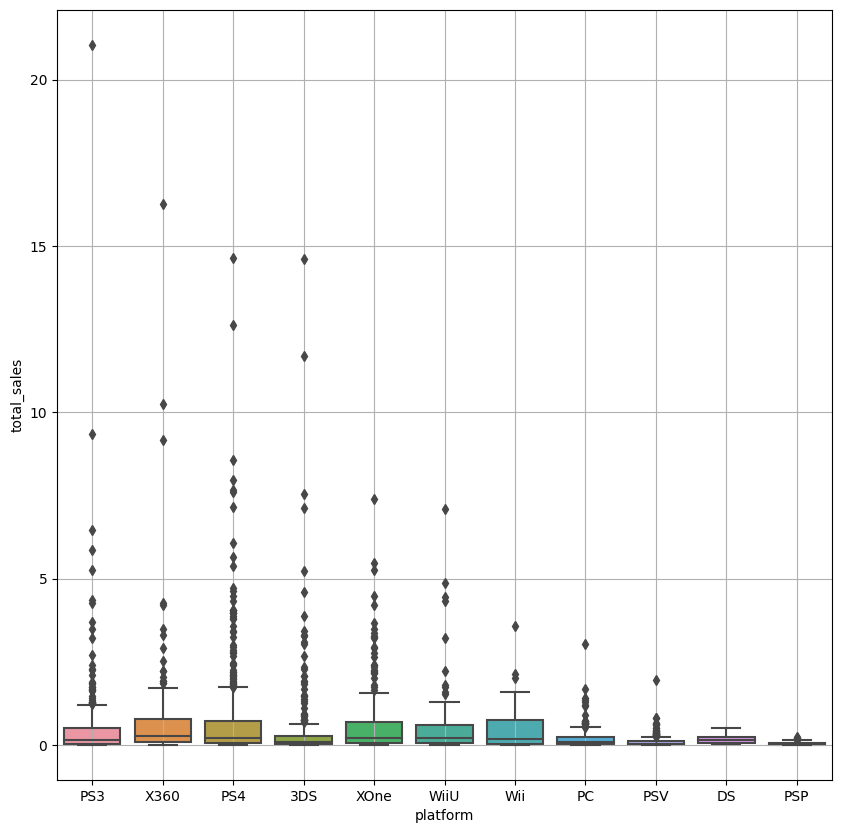

In [41]:
# Create a boxplot using seaborn
plt.figure(figsize=(10,10))
sns.boxplot(x='platform', y='total_sales', data=new_data)
plt.grid(True)
plt.show()

In [42]:
# Pivot table about avg game platform total sales
avg_platform_sales = new_data.pivot_table(values='total_sales', 
                                       index='platform',
                                       aggfunc=['mean', 'count'])
avg_platform_sales.columns = ['avg_sales', 'total_game']

In [43]:
avg_platform_sales.sort_values('avg_sales', ascending=False)

,avg_sales,total_game
platform,,
PS4,0.801378,392
X360,0.735484,186
XOne,0.645020,247
Wii,0.593913,23
WiiU,0.562000,115
PS3,0.525884,345
3DS,0.472772,303
PC,0.208624,189
DS,0.192500,8


**Kesimpulan:**

* Ditinjau dari grafik boxplot, tidak ada perbedaan drastis antara rata-rata penjualan. Data secara statistik juga menunjukkan tidak ada perbedaan yang signifikan.
* Rata-rata penjualan tertinggi yaitu platform PS4 dan memiliki jumlah game terbanyak juga yaitu 392.

### 2.6. Korelasi Penjualan dan Ulasan Pada Tahun 2013-2016

In [44]:
ps4_sales = new_data[new_data['platform'] == 'PS4']

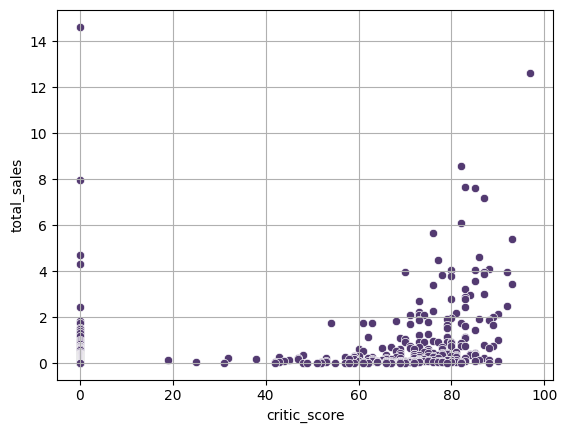

In [48]:
sns.scatterplot(x="critic_score", y="total_sales", data=ps4_sales, color='#533A71')
plt.grid(True)
plt.show()

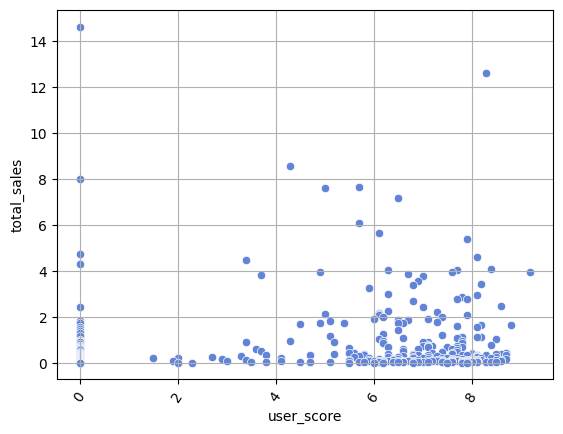

In [46]:
sns.scatterplot(x="user_score", y="total_sales", data=ps4_sales, color='#6184D8')
plt.xticks(rotation=55)
plt.grid(True)
plt.show()

In [51]:
ps4_sales.corr(numeric_only=True)['critic_score']

year_of_release   -0.126706
na_sales           0.217381
eu_sales           0.221950
jp_sales           0.011250
other_sales        0.229948
critic_score       1.000000
user_score         0.900850
total_sales        0.227550
Name: critic_score, dtype: float64

In [52]:
ps4_sales.corr(numeric_only=True)['user_score']

year_of_release   -0.062157
na_sales           0.109930
eu_sales           0.111441
jp_sales          -0.027284
other_sales        0.115411
critic_score       0.900850
user_score         1.000000
total_sales        0.113116
Name: user_score, dtype: float64

* Lihatlah bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang Anda pilih). Buatlah sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Tarik kesimpulannya.
* Dengan mengingat kesimpulan Anda sebelumnya, bandingkan penjualan game yang sama pada platform lain.
* Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Dapatkah Anda melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?